### Mode occupancy in nonlinear multimode systems

In [3]:
import matplotlib.pyplot as plt
import numpy as np

For a $m\times n$ weakly nonlinear waveguide array, the amplitude in the $m,n$-th waveguide $A_{m,n}$ over a distance $z$ is described as:

$\displaystyle i\frac{d A_{k,l}}{d z}-\kappa_1(A_{k-1,l}+A_{k+1,l})-\kappa_2(A_{k,l-1}+A_{k,l+1})-|A_{k,l}|^2A_{k,l}=0$

where $\kappa_1,\kappa_2$ are coupling coefficients in the two transverse directions.

In [4]:
m,n=20,20
A = np.zeros((m,n),dtype=np.complex128)
P = 50

As an approximation, "weakly nonlinear" means the fourth nonlinear term can be ignored.
\begin{align*}
\frac{d A_{k,l}}{d z} &= -i\kappa_1(A_{k-1,l}+A_{k+1,l})-i\kappa_2(A_{k,l-1}+A_{k,l+1})\\
\frac{d \textbf{a}}{d z} &= -iH\textbf{a}
\end{align*}
If so, such a system has $mn$ eigenvectors $\psi_i$ (for $H$), mode occupancy at the input (initial mode occupancy) can be obtained by $|c_{i0}|^2=|\langle\psi_i|\Psi\rangle|^2$, where $\Psi=(A_{1,1},A_{1,2},\ldots,A_{m,n})^T$ is called the *input complex optical field vector*.

eigenvalues $E_i=2\kappa_1\cos\left(\frac{k\pi}{m+1}\right)+2\kappa_2\cos\left(\frac{l\pi}{n+1}\right),\allowbreak\quad k,l\in\{1,2,\ldots,L\}$

eigenvectors $\psi_i$ have elements $(\psi_i)_j=\frac{2}{\sqrt{(m+1)(n+1)}}\sin\left(\frac{k\pi a}{m+1}\right)\sin\left(\frac{l\pi b}{n+1}\right)$,

where $a=j // n+1$, $b=j\%n+1$, $j=\{0,1,2,\ldots,mn-1\}$

When $\kappa_1=1,\kappa_2=1.5$, $E_i$ is bounded between $(-5,5)$, average $\overline{E}=0$

In [5]:
kappa_1,kappa_2 = 1,1.5

#### Experiment 1: 
input mode occupancy uniformly distributed between $(1,2)$

In [6]:
from math import sin,cos
def psi(i):
    # eigenvectors
    # i between 0 and m*n-1, inclusive
    k=i//n+1
    l=i%n+1
    psi_vec = np.zeros(m*n,dtype=np.complex128)
    for j in range(m*n):
        a=j//n+1
        b=j%n+1 
        psi_vec[j] = 2./((m+1)*(n+1))**.5*\
                       sin(k*np.pi*a/(m+1))*\
                        sin(l*np.pi*b/(n+1))
    return psi_vec
def E(i):
    k=i//n+1
    l=i%n+1
    return 2*kappa_1*cos(k*np.pi/(m+1))+2*kappa_2*cos(l*np.pi/(n+1))

The eigenvalues are plotted as follows:

400

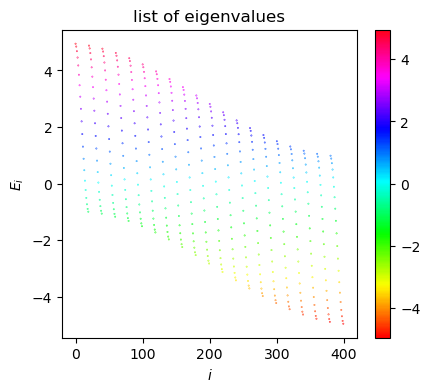

In [7]:
E_i=[]
for i in range(m*n):
    E_i.append(E(i))
plt.figure(figsize=(4.75,4))
i = np.arange(len(E_i))
plt.scatter(i,E_i,s=0.1,cmap='hsv',c=E_i)
plt.xlabel('$i$')
plt.ylabel('$E_i$')
plt.title('list of eigenvalues')
plt.colorbar()
len(E_i)

A total of 50 modes with a total occupancy of 50.0


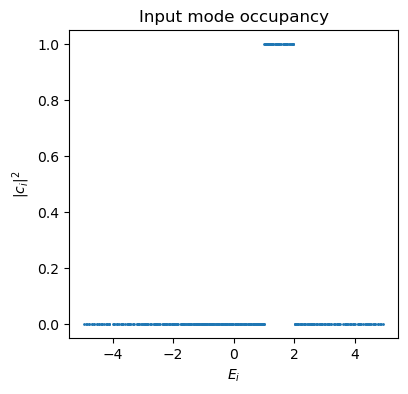

In [8]:
from random import random
def input1():
    # input mode occupancy
    number_of_modes=0
    Psi = np.zeros(m*n,dtype=np.complex128)
    mode_indices = []
    for i in range(m*n):
        if 1<E_i[i]<2:
            number_of_modes+=1
            mode_indices.append(i)
    for i in mode_indices:
        # input, uniform distribution
        # with RANDOM phase factor
        Psi += (P/number_of_modes)**.5 * psi(i) * np.exp(-1j*random()*2*np.pi)
    return Psi

def input2():
    # input mode occupancy
    number_of_modes=0
    Psi = np.zeros(m*n,dtype=np.complex128)
    mode_indices = []
    for i in range(m*n):
        if -3<E_i[i]<-1:
            number_of_modes+=1
            mode_indices.append(i)
    for i in mode_indices:
        # input, uniform distribution
        # with RANDOM phase factor
        Psi += (P/number_of_modes)**.5 * psi(i) * np.exp(-1j*random()*2*np.pi)
    return Psi

def input3():
    # input mode occupancy
    number_of_modes=0
    Psi = np.zeros(m*n,dtype=np.complex128)
    mode_indices = []
    for i in range(m*n):
        if -2<E_i[i]<-1 or 1<E_i[i]<3:
            number_of_modes+=1
            mode_indices.append(i)
    for i in mode_indices:
        # input, uniform distribution
        # with RANDOM phase factor
        Psi += (P/number_of_modes)**.5 * psi(i) * np.exp(-1j*random()*2*np.pi)
    return Psi

# # -----------------------
# def input1():
#     return psi(1) * P
# # -----------------------

Psi = input1()
mode_occupancy1 = []
for i in range(m*n):
    mode_occupancy1.append(np.square(np.abs(psi(i).dot(Psi))))
plt.figure(figsize=(4.25,4))
plt.scatter(E_i,mode_occupancy1,s=1)
plt.xlabel('$E_i$')
plt.ylabel('$|c_i|^2$')
plt.title('Input mode occupancy')
mode_occupancy1 = np.array(mode_occupancy1)
print('A total of %d modes with a total occupancy of %.1f'%(np.sum(mode_occupancy1>1e-2),np.sum(mode_occupancy1)))

Text(0.5, 1.0, 'real and imag part of input')

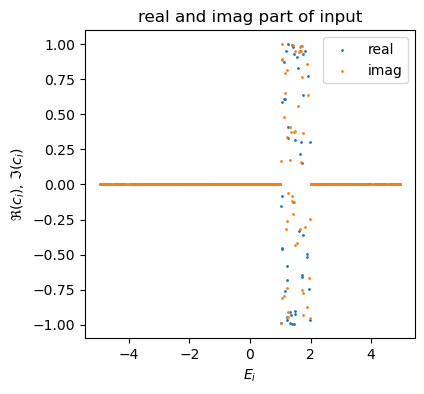

In [9]:
real_Psi = []
imag_Psi = []
for i in range(m*n):
    real_Psi.append(np.real((np.conjugate(psi(i)).dot(Psi))))
    imag_Psi.append(np.imag((np.conjugate(psi(i)).dot(Psi))))
plt.figure(figsize=(4.25,4))
plt.scatter(E_i,real_Psi,s=1,label='real')
plt.scatter(E_i,imag_Psi,s=1,label='imag')
plt.xlabel('$E_i$')
plt.ylabel('$\Re(c_i)$, $\Im(c_i)$')
plt.legend()
plt.title('real and imag part of input')

The eigenvectors are normalized and mutually orthogonal

In [10]:
print(np.sum((psi(1)*psi(1))))   # ≈ 1
print(np.sum((psi(1)*psi(2))))   # ≈ 0
print(np.sum((psi(3)*psi(48))))   # ≈ 0

(1+0j)
(-4.163336342344337e-17+0j)
(4.336808689942018e-19+0j)


Solve the IVP and observe

First, we ignore the nonlinear term in our equation, the expected solution is $\textbf{a}(z)=\textbf{T}\textbf{a}(0)$, $\textbf{T}=e^{-i\textbf{H}z}$ is the transmission

In [11]:
def kl2i(k,l):
    # we're using a flattened 1D array for a 2D lattice
    # this will convert lattice index to array index
    if k>m or k<1 or l>n or l<1:
        return -1  # the amplitude value is 0 on the edge
    k-=1
    l-=1
    return k*n+l

def i2kl(i):
    k=i//n+1
    l=i%n+1
    return k,l

Now we show the eigenvector expression is correct

Text(0.5, 1.0, '$a$ is the eigenvector of $H$, eigenvalue 4.94')

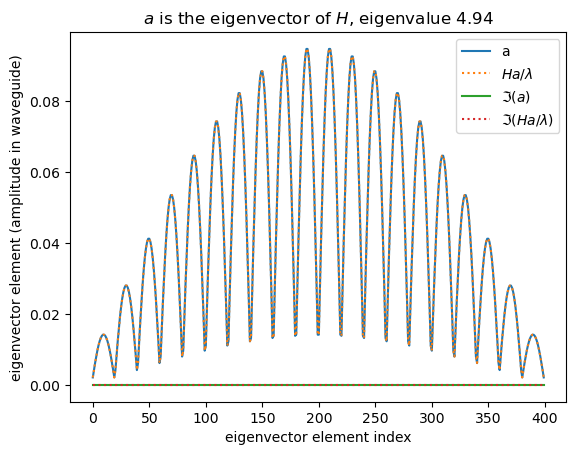

In [12]:
def kl2i(k,l):
    # we're using a flattened 1D array for a 2D lattice
    # this will convert lattice indices k,l to array index i
    if k>m or k<1 or l>n or l<1:
        return -1  # the amplitude value is 0 on the edge
    k-=1
    l-=1
    return k*n+l

def i2kl(i):
    k=i//n+1
    l=i%n+1
    return k,l

# change k,l to check other eigenvectors
k=1
l=1

index = (k-1)*n+(l-1)
a = psi(index)

mat_H = np.zeros((m*n,m*n),dtype=np.complex128)
for i in range(m*n):
    k,l = i2kl(i)
    i1,i2,i3,i4 = kl2i(k-1,l), kl2i(k+1,l),kl2i(k,l-1), kl2i(k,l+1)
    if i1!=-1: # if the index is -1, it means k,l are outside the matrix, hence 0, as defined in kl2i(k,l)
        mat_H[i,i1] = kappa_1
    if i2!=-1:
        mat_H[i,i2] = kappa_1
    if i3!=-1:
        mat_H[i,i3] = kappa_2
    if i4!=-1:
        mat_H[i,i4] = kappa_2

def H(a):
    # Ha = np.zeros(m*n,dtype=np.complex128)
    # for i in range(m*n):
    #     # loop through vector elements
    #     k,l = i2kl(i)
    #     i1,i2,i3,i4 = kl2i(k-1,l), kl2i(k+1,l),kl2i(k,l-1), kl2i(k,l+1)
    #     a1 = (i1!=-1)*a[i1]  # if the index is -1, it means k,l are outside the matrix, hence 0, as defined in kl2i(k,l)
    #     a2 = (i2!=-1)*a[i2]
    #     a3 = (i3!=-1)*a[i3]
    #     a4 = (i4!=-1)*a[i4]
    #     Ha[i] = (
    #         kappa_1*(a1 + a2)+\
    #         kappa_2*(a3 + a4)
    #     )
    return np.matmul(mat_H,a)

Ha = H(a)

plt.plot(np.real(a),label='a')
plt.plot(np.real(Ha / E(index)), label='$Ha/\lambda$',linestyle='dotted')
plt.plot(np.imag(a),label='$\Im(a)$')
plt.plot(np.imag(Ha / E(index)), label='$\Im(Ha/\lambda)$',linestyle='dotted')
# plt.plot(Ha,label='$Ha$')
plt.legend()
plt.xlabel('eigenvector element index')
plt.ylabel('eigenvector element (amplitude in waveguide)')
plt.title(f'$a$ is the eigenvector of $H$, eigenvalue {E(index):.2f}')

In [13]:
def check_hermitian(H):
    try:
        np.testing.assert_allclose(
            H,
            np.conj(H.T),
            atol=1e-10,
            err_msg='not Hermitian'
        )
        print('Hermitian')
    except AssertionError as e:
        print(f'Warning: {str(e)}')

check_hermitian(mat_H)

Hermitian


In [14]:
from scipy.integrate import solve_ivp
# class Solution:
#     def __init__(self,size,t):
#         self.y = np.zeros(size,dtype=np.complex128)
#         self.message = 'asdf'
#         self.t = t

# def solve_ivp(f,t_span,Psi,method,t_eval):
#     solution = Solution((len(t_eval),len(Psi)), t_eval)
#     solution.y[0]=Psi
#     for i in range(1,len(t_eval)):
#         a = solution.y[i-1]
#         solution.y[i] = solution.y[i-1]+f(t_eval[i],solution.y[i-1])*(t_eval[i]-t_eval[i-1])
#     solution.y = solution.y.T
#     return solution

def enforce_boundary_conditions(z,a):
    mag = np.conjugate(a).dot(a)  # normalize a
    a *= P/mag
    
    return 0  # unused return value

enforce_boundary_conditions.terminal = False  # Don't stop integration
enforce_boundary_conditions.direction = 0     # Trigger regardless of sign change

def input0():
    return psi(50) * np.sqrt(P)

def func(z,a,):
    # our ode, ignoring the nonlinear term

    dadz = -1j * (H(a))

    return dadz

z_span = [0,1000]

skip=10000

# average over 1 input(s)
Psi_rand = [input1() for i in range(1)]
az = []  # a(z)
for i,Psi in enumerate(Psi_rand):
    z_eval = np.linspace(*z_span, 100*skip)
    solution = solve_ivp(func,z_span, Psi, method='RK45',t_eval=z_eval,events=[enforce_boundary_conditions])#,events=[enforce_boundary_conditions])
    az.append(solution.y)
    if 'less' in solution.message:
        print(solution.message, f'{i+1}/{len(Psi_rand)}')
    else:
        print(solution.message, f'{i+1}/{len(Psi_rand)}',end='\r')

z = solution.t

In [15]:
occup = np.zeros((m*n,solution.t.shape[0]), dtype=np.float64)
for a_final in az:
    projection = []
    for i in range(m*n):
        temp = a_final.T.dot(psi(i))
        projection.append(temp)
    occup += np.square(np.abs(projection))

occup /= len(Psi_rand)  # average

plt.plot(solution.t[::skip], np.sum(occup,axis=0)[::skip])
plt.xlabel('z')
plt.ylabel('power $P$')
plt.title('Power conservation check')
occup = occup.T

KeyboardInterrupt: 

Text(0.5, 0, '$|c_i|^2$')

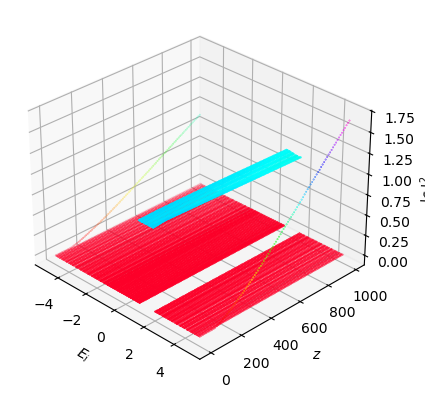

In [ ]:
fig = plt.figure()

E_i=[]
for i in range(m*n):
    E_i.append(E(i))

X,Y = np.meshgrid(E_i, solution.t[::skip])
ax = fig.add_subplot(111,projection='3d')
surf = ax.scatter(X,Y,occup[::skip],s=0.1,cmap='gist_rainbow',c=occup[::skip])

ax.view_init(elev=30, azim=-45)

ax.set_xlabel('$E_i$')
ax.set_ylabel('$z$')
ax.set_zlabel('$|c_i|^2$')

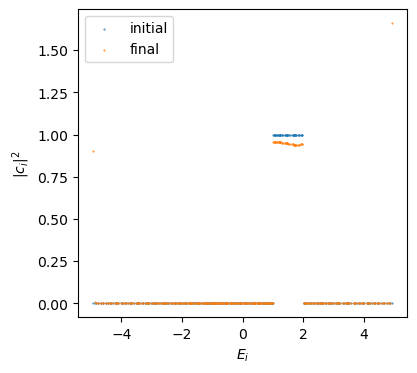

In [ ]:
# initial and final distribution
plt.figure(figsize=(4.25,4))
plt.scatter(E_i,occup[0],label='initial',s=0.2)
plt.scatter(E_i,occup[-1],label='final',s=0.2)
plt.xlabel('$E_i$')
plt.ylabel('$|c_i|^2$')
plt.legend()

As expected, the solution is constant, if the system is completely **linear**

Now we add the nonlinear term

In [52]:
from scipy.integrate import solve_ivp

def enforce_boundary_conditions(z,a):
    mag = np.conjugate(a).dot(a)  # normalize a
    a *= P/mag

    return 0  # unused return value

enforce_boundary_conditions.terminal = False  # Don't stop integration
enforce_boundary_conditions.direction = 0     # Trigger regardless of sign change

def func(z,a,):
    # our ode, ignoring the nonlinear term

    dadz = -1j * (H(a)+np.square(np.abs(a))*a)

    return dadz

z_span = [0,1000]

skip = 10000  # number of points to skip during plot (too slow otherwise)

Psi_rand = [input3() for i in range(10)] # average over 100 inputs
az = []  # a(z)
for i,Psi in enumerate(Psi_rand):
    z_eval = np.linspace(*z_span, 100*skip)
    solution = solve_ivp(func, z_span, Psi, method='DOP853',t_eval=z_eval,events=[enforce_boundary_conditions])
    az.append(solution.y)
    if 'less' in solution.message:
        print(solution.message, f'{i+1}/{len(Psi_rand)}')
    else:
        print(solution.message, f'{i+1}/{len(Psi_rand)}',end='\r')

z = solution.t

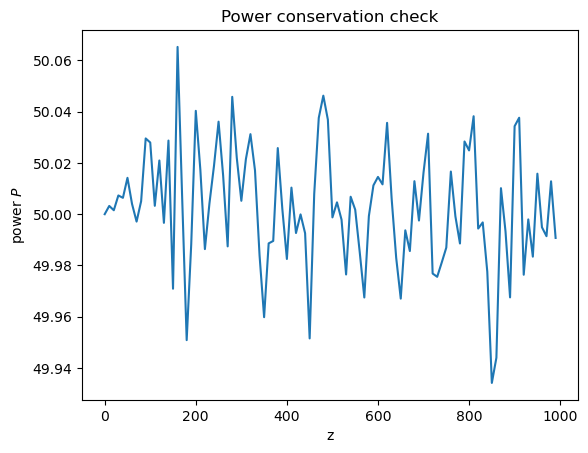

In [53]:
occup = np.zeros((m*n,solution.t.shape[0]), dtype=np.float64)
projection = np.zeros((m*n, m*n), dtype=np.complex128)
for i in range(m*n):
    projection[i] = psi(i)
# now, projection is a matrix with all eigenvectors, for later projection on them

temp = np.zeros((m*n,solution.t.shape[0]), dtype=np.complex128)
for i,a_final in enumerate(az):
    temp = projection.dot(a_final)
    occup += np.square(np.abs(temp))
    print('%i/%i'%(i+1,len(az)),end='\r')

occup /= len(Psi_rand)  # average

plt.plot(solution.t[::skip], np.sum(occup,axis=0)[::skip])
plt.xlabel('z')
plt.ylabel('power $P$')
plt.title('Power conservation check')
occup = occup.T

Text(0.5, 0, '$|c_i|^2$')

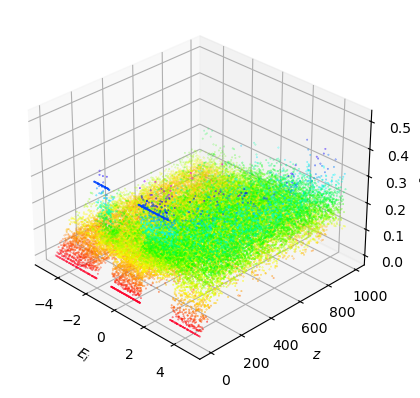

In [54]:
fig = plt.figure()

E_i=[]
for i in range(m*n):
    E_i.append(E(i))
E_i = np.array(E_i)

X,Y = np.meshgrid(E_i, solution.t[::skip])
ax = fig.add_subplot(111,projection='3d')
surf = ax.scatter(X,Y,occup[::skip],s=0.1,cmap='gist_rainbow',c=occup[::skip])

ax.view_init(elev=30, azim=-45)

ax.set_xlabel('$E_i$')
ax.set_ylabel('$z$')
ax.set_zlabel('$|c_i|^2$')

Text(0.5, 1.0, 'step size $\\times 0.1$')

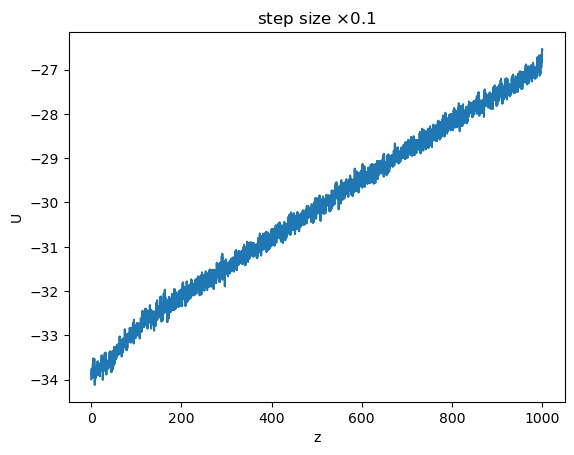

In [55]:
M = m*n
U = np.zeros(len(z_eval),dtype=np.float64)
for i in range(m*n):
    U -= E_i[i]*occup[:,i]
plt.xlabel('z')
plt.ylabel('U')
plt.plot(z_eval,U)
plt.title(r'step size $\times 0.1$')

In [56]:
rho = U[0]+P*np.array(E_i)   # calculate rho from initial input
def f(x):
    return np.sum(x/(x-rho))-M
e_1, e_n = np.min(E_i), np.max(E_i)
bound_1, bound_2 = U[0]+P*e_1,U[0]+P*e_n  # x=MT, for all bound_1<x<bound_2, T=x/M is not valid

def find_T(bound, T_positive, tolerance=1e-8, max_iter=1000):
    # if T>0, bound is a lower bound
    # if T<0, bound is a upper bound
    a=bound
    b=0
    ans = None
    step = 1
    bisecting = False
    iters = 0
    while True:
        if bisecting:
            if np.abs(a-b)<tolerance:
                print('T found successfully, T=%.2f'%(c/M))
                break
            c=(a+b)/2
            if f(c)>0:
                a=c
            else:
                b=c
        else:
            if T_positive:
                a+=step
                if f(a)<0:
                    b=a
                    a-=step
                    bisecting=True
            else:
                a-=step
                if f(a)<0:
                    b=a
                    a+=step
                    bisecting=True
        iters+=1
        if iters>max_iter:
            print('max iteration reached')
            break
    return c/M   # because the value found is x, x=MT


T>0
T found successfully, T=1.15


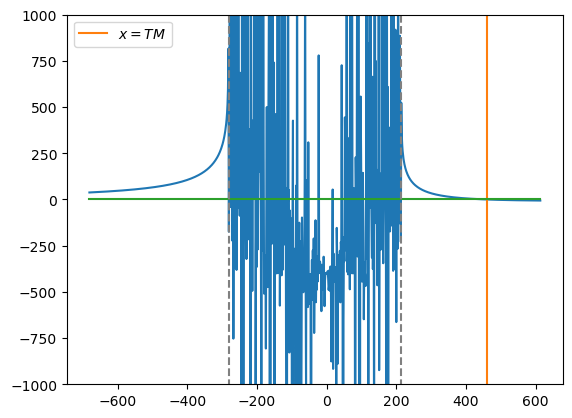

In [57]:
x = np.linspace(-M+bound_1,bound_2+M,1000)
f_x = []
for i,x_i in enumerate(x):
    f_x.append(f(x_i))

plt.plot(x,f_x)
plt.ylim([-1000,1000])

# find T
minus_U_over_P = -U[0]/P
mean_e = np.mean(E_i)
T_positive = None

if minus_U_over_P>mean_e:
    print('T>0')
    T_positive = True
    bound = bound_2
else:
    print('T<0')
    T_positive = False
    bound = bound_1

T = find_T(bound, T_positive)

plt.plot([T*M,T*M],[1000,-1000], label='$x=TM$')
plt.plot([-M+bound_1,bound_2+M],[0,0])
plt.plot([bound_1,bound_1],[1000,-1000],linestyle='--',c='grey')
plt.plot([bound_2,bound_2],[1000,-1000],linestyle='--',c='grey')
plt.legend()

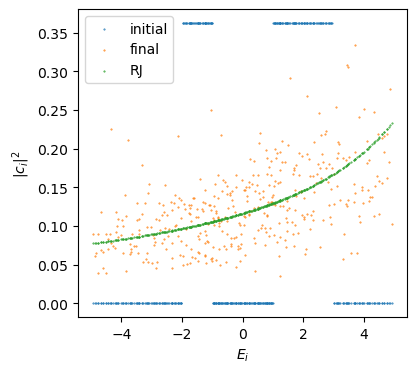

In [58]:
# initial and final distribution
plt.figure(figsize=(4.25,4))
plt.scatter(E_i,occup[0],label='initial',s=0.2)
plt.scatter(E_i,occup[-1],label='final',s=0.2)

mu = (U[0]-M*T)/P
plt.scatter(E_i,-T/(mu+E_i),s=0.2,label='RJ')

plt.xlabel('$E_i$')
plt.ylabel('$|c_i|^2$')
plt.legend()

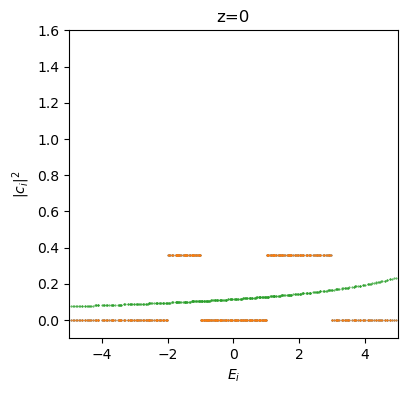

In [59]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
occups_to_animate = occup[::skip]
fig = plt.figure(figsize=(4.25,4))
def animate_func(i):
    plt.cla()
    plt.xlabel('$E_i$')
    plt.ylabel('$|c_i|^2$')
    plt.xlim(-5,5)
    plt.ylim(-0.1,1.6)
    plt.scatter(E_i,occup[0],label='initial',s=0.2)
    plt.scatter(E_i,occups_to_animate[i],label='final',s=0.2)
    plt.scatter(E_i,-T/(mu+E_i),s=0.2,label='RJ')
    plt.title('z=%i'%(i*10))

ani = FuncAnimation(fig,animate_func,frames=100,interval = 80)
HTML(ani.to_jshtml())

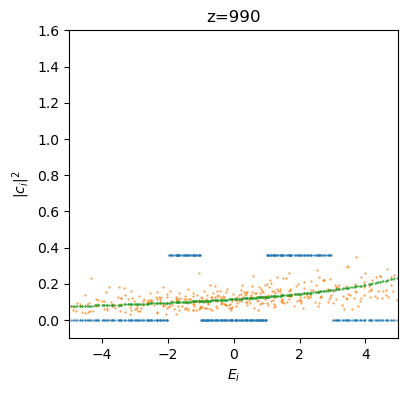

In [60]:
fig = plt.figure(figsize=(4.25,4))
for i in range(100):
    animate_func(i)
    plt.savefig('imgs/s-%i.png'%i)

#### A huge flop

After days of futile efforts, I have to stop.

The nonlinear term makes solution diverge quickly, probably due to the abnormal behaviour of $0$ and $m\times n-1$-th mode in previous linear solutions.

Even tried to set the two modes to 0 in every step, to force them like a boundary condition, it only makes more modes nearby to diverge too.

I can't see why

Without the nonlinear part, the equation can be solved exactly.

Each mode evolves as $e^{-i\textbf{H}z}\psi_i=e^{-iE_i z}\psi_i$

In [61]:
# E_i=[]
# for i in range(m*n):
#     E_i.append(E(i))

# Psi = input1()
# print(Psi.shape)
# weights = []
# psis = []
# for i in range(m*n):
#     psis.append(psi(i))
#     weights.append(psis[i].dot(Psi))

# z = np.linspace(0,1000,100)
# az = np.zeros((m*n,len(z)),dtype=np.complex128)
# for w,p in zip(weights,psis):
#     az += w * np.outer(p,np.exp(-1j*E(i)*z))

# occup = []
# for i in range(m*n):
#     temp = az.T.dot(psi(i))
#     occup.append(temp)
# occup = np.square(np.abs(occup))
# occup = occup.T

# fig = plt.figure()
# X,Y = np.meshgrid(E_i, z)
# ax = fig.add_subplot(111,projection='3d')
# surf = ax.scatter(X,Y,occup,s=0.1,cmap='gist_rainbow',c=occup)

# ax.view_init(elev=30, azim=-45)

# ax.set_xlabel('$E_i$')
# ax.set_ylabel('$z$')
# ax.set_zlabel('$|c_i|^2$')
# ax.set_title('Mode occupancy against $E_i$ over $z$')

I wonder why the linear solution found numerically does not match this.

Numerical error or some neglected factors in mode decomposition?